Laboratorium 6
Opis zadania

Projekt należy wykonać w grupach 2-3 osobowych. Wszystkie osoby z grupie otrzymują wspólną ocenę za całość projektu (szczegółowy opis i elementy projektu znajduje się poniżej).
Narzędzia

Preferowanym narzędziem wykonania projektu jest Jupyter Notebook - język Python (chyba, że prowadzący laboratorium wyrazi zgodę na inną technologię).

W zadaniu można korzystać z bibliotek:

    numpy,
    pandas,
    scikit-learn,
    scipy,
    matplotlib,
    inne (po uzgodnienieu z prowadzącym).

Wysyłanie projektu

Projekt powinien składać się z następujących elementów:

    Baza danych (wybrana baza danych).
    Notatnik z implementacją rozwiązania - plik *.ipynb (+ ewentualnie pliki *.py).
    Prezentacja - plik *.pdf oraz plik ze źródłem prezentacji (w zależności od tego w czym prezentacja była wykonana może to być plik: *.tex, *.ppt, *.pptx, *.md, *.odp). Prezentacja powinna trwać maksymalnie 5 minut (po przekroczeniu czasu prezentacja jest przerywana).

Wszystkie pliki powinny zostać spakowane archiwizatorem zip i wysłane przez platformę WIKAMP.

Struktura plików jaką należy oddać do oceny (przykład):

+-- 📂 [NAZWA_PROJEKTU]
    +-- 📂 projekt
        +-- 📜 projekt.ipynb
        +-- 📜 opcjonalny_plik.py
    +-- 📂 prezentacja
        +-- 📜 prezentacja.pdf
        +-- 📜 prezentacja.md
    +-- 📂 baza_danych
        +-- 📜 plik.csv
        +-- 📜 plik.info

Elementy jakie powinny się znaleźć w projekcie:

1. Zbiór danych (minimum 6 klas).

    Sugerowana strona ze zbiorami danych (może być inne źródło, jeżeli prowadzący wyrazi zgodę): https://archive.ics.uci.edu.

    UWAGA: Skład osobowy grupy oraz wybrany zbiór danych należy zgłosić prowadzącemu - kolejność zgłoszeń ma znaczenie (zabezpieczenie by dwie grupy nie wybrały takiego samego zbioru danych).

2. Podział zbioru danych na treningowy i testowy.

    Parametry podziału (proporcje) powinny być konfigurowalne.

3. Wstępna analiza danych.

    Ile jest próbek każdej klasy, ile jest cech, czy dane są znormalizowane, czy wymagają normalizacji, czy są inne czynności jakie należy wykonać, statystyki (tylko istotne - takie które wpływają na dalsze kroki).

4. Wstępne przetworzenie danych (preprocessing).

        Normalizacja danych,
        podział zbioru treningowego na treningowy i walidacyjny,
        usunięcie błędnych danych.

5. Selekcja cech.

    Opis jakie metody selekcji cech zastosowano, dlaczego wybrano taką metodę a nie inną.

6. Klasyfikacja.

    Przeprowadź klasyfikację poznanymi metodami klasyfikacji:

        NN,
        k-NN,
        NM.

    Oprócz powyższego:

        przeprowadź analizę wyników,
        wybierz metodę i uzasadnij wybór.

7. Przetestuj wybrane modele na zbiorze testowym.

    Wykonaj analizę i przedstaw wyniki badań.

8. Wnioski.

    Napisz wnioski z przeprowadzonego projektu.

## Projekt w grupie: 

Krzysztof Bortnowski 249854

In [133]:
# Zbiór danych - minimum 6 klas
import numpy as np
import pandas as pd
pandas_table = pd.read_table('./abalone/abalone.data', delimiter=',', names=['0', '1', '2', '3', '4', '5', '6', '7', '8'])


In [134]:
# Usuwanie danych powodujących błędy 
# Należy usunąć 1. kolumne ponieważ nie jest ona liczbami albo zamienić płcie na liczby 
pandas_table_fixed = pandas_table.drop(columns=['0'])
data = pandas_table_fixed.to_numpy()
kolumna_klas = 7
print(data)
print(data[:,kolumna_klas])

[[ 0.455   0.365   0.095  ...  0.101   0.15   15.    ]
 [ 0.35    0.265   0.09   ...  0.0485  0.07    7.    ]
 [ 0.53    0.42    0.135  ...  0.1415  0.21    9.    ]
 ...
 [ 0.6     0.475   0.205  ...  0.2875  0.308   9.    ]
 [ 0.625   0.485   0.15   ...  0.261   0.296  10.    ]
 [ 0.71    0.555   0.195  ...  0.3765  0.495  12.    ]]
[15.  7.  9. ...  9. 10. 12.]


In [136]:
# Podział na testowe i treningowe
# parametrem pocziału jest liczba p_p. Mówi ona o rozmiarze zbioru treningowego
p_p = 3600
train = data[0:p_p]
test = data[p_p+1:len(data)]
print(len(train))
print(len(test))

3600
576


In [141]:
# Selekcja klas
klasy = [3, 5, 8]
train_new = train[np.isin(train[:,kolumna_klas], klasy)]
test_new =  test[np.isin(test[:,kolumna_klas], klasy)]

### Analiza danych 
1. Klasą jest wiek drzewa lub inaczej mówiąc liczba jego zwoji. Jest ona liczbą całkowitą od 1 do 29 ze średnią równą 9.934
2. Dane nie są znormalizowane i należy je znormalizować, lecz nie odstają od siebie w sposób znaczący 

|   x    | Length | Diam  | Height | Whole | Shucked | Viscera | Shell | Rings |
| :----- | :----- | :---- | :----- | :---- | :------ | :------ | :---- | :---- |
| Min    | 0.075  | 0.055 | 0.000  | 0.002 | 0.001   | 0.001   | 0.002 | 1     |
| Max    | 0.815  | 0.650 | 1.130  | 2.826 | 1.488   | 0.760   | 1.005 | 29    |
| Mean   | 0.524  | 0.408 | 0.140  | 0.829 | 0.359   | 0.181   | 0.239 | 9.934 |
| SD     | 0.120  | 0.099 | 0.042  | 0.490 | 0.222   | 0.110   | 0.139 | 3.224 |
| Correl | 0.557  | 0.575 | 0.557  | 0.540 | 0.421   | 0.504   | 0.628 | 1.0   |


In [143]:
# Normalizacja
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train[:,0:kolumna_klas])
przeskalowane_trenowane = scaler.transform(train_new[:,0:kolumna_klas])
przeskalowane_testowe = scaler.transform(test_new[:,0:kolumna_klas])

In [149]:
# Selekcja cech z wykorzystaniem wyboru k najlepszych cech
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(k=3).fit(przeskalowane_trenowane, train_new[:,kolumna_klas] )# wybieramy k "najlepszych" cech"
print(selector.get_feature_names_out())
Wyselektowane_treningowe = selector.transform(przeskalowane_trenowane)# wykonujemy selekce na zbiorze
Wyselektowane_testowe = selector.transform(przeskalowane_testowe)# wykonujemy selekce na zbiorze
#print(Wyselektowane_testowe)

['x0' 'x1' 'x6']


In [170]:
# Pomiar dokładności - działa
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


def ilustracja_dokladnosci(y_true, y_pred):
    cm =confusion_matrix(y_true, y_pred, labels=klasy)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=klasy)
    disp.plot()

    plt.show()
    print("Dokładność = " + str(accuracy_score(y_true, y_pred)*100))


In [171]:
# Liczenie odleglosci euklidesa
def edist(p1, p2, l_cech):
    edvalue=0
    for cecha in range(l_cech):
        edvalue +=(p1[cecha]- p2[cecha])**2
    return edvalue**(0.5)

In [172]:
def knn(treningowy, testowy, cechy, n):
    result = []
    for i in range(len(testowy)):
        distList = []
        #liczenie odleglosci do kazdego punktu
        for j in range(len(treningowy)):
            distList.append([edist(testowy[i], treningowy[j], cechy), train_new[j,kolumna_klas]])
        #wybor n  najblizszych sasiadow
        distList.sort()
        classes = np.array(distList)[:n,1]
        #wybor elementu dominujacego
        values, counts = np.unique(classes, return_counts=True)
        ind = np.argmax(counts)
        result.append(values[ind])
    return result

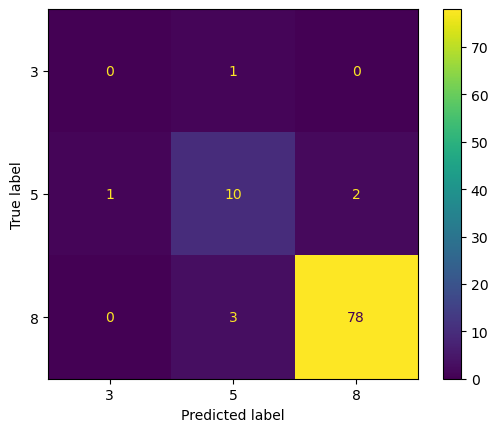

Dokładność = 92.63157894736842


In [173]:
# NN
y_real = test_new[:,kolumna_klas]
y_pred = knn(Wyselektowane_treningowe, Wyselektowane_testowe, len(Wyselektowane_testowe[0]), 1)
ilustracja_dokladnosci(y_real,y_pred)

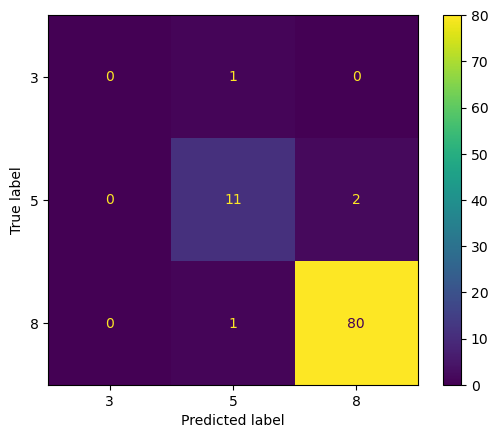

Dokładność = 95.78947368421052


In [174]:
# k - NN
y_real = test_new[:,kolumna_klas]
y_pred = knn(Wyselektowane_treningowe, Wyselektowane_testowe, len(Wyselektowane_testowe[0]), 3)
ilustracja_dokladnosci(y_real,y_pred)

In [198]:
# NM
# Policzenie średnich wszystkich cech dla wszystkich kategorii -> Zrobione



def enm(treningowa_nieprzeskalowana,treningowa, testowa, features, classes):
    punkt = [1, 1, 1]
    ilosc_danych = np.zeros(len(classes))
    i = 0
    # Liczenie powtórzeń
    for klasa in classes:
            for trainer in range(len(treningowa)):
                if (treningowa_nieprzeskalowana[trainer, kolumna_klas] == klasa):
                    ilosc_danych[i] = ilosc_danych[i] +1
            i=i+1
    print(ilosc_danych)
    suma = [ [0] * features for _ in range(len(classes))]
    srednia = [ [0] * features for _ in range(len(classes))]

    #liczenie sumy
    i=0
    for klasa in classes:
            for trainer in range(len(treningowa)):
                    if (treningowa_nieprzeskalowana[trainer, kolumna_klas] == klasa):
                        suma[i] = suma[i] + treningowa[trainer,:]
            i = i+1

    #liczenie średnich
    for klasa in range(0,len(classes)):
        for cecha in range(0,features):
            srednia[klasa][cecha] = suma[klasa][cecha] / ilosc_danych[klasa]

    print(srednia)


    przyd_klasa = [] #Przydział klasowy

    for tester in testowa:
        for i in range(features):
            punkt[i] = tester[i]

        minimal = 100;
        for i in range(len(classes)):
            if edist(srednia[i],punkt,features) < minimal:
                minimal = edist(srednia[i],punkt,features) 
                klasa_do_dodania = classes[i]
        przyd_klasa.append(klasa_do_dodania)

    return przyd_klasa



[ 14. 102. 487.]
[[0.1336872586872587, 0.1206482593037215, 0.007046764894298527], [0.2836512983571808, 0.2612456747404841, 0.034682532704162876], [0.5726177923303177, 0.554932445257363, 0.1776339280690068]]


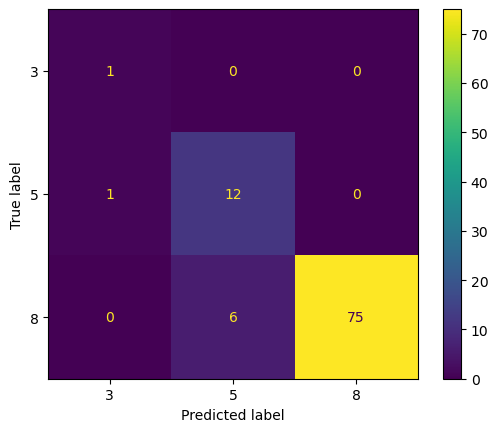

Dokładność = 92.63157894736842


In [200]:
y_real = test_new[:,kolumna_klas]
y_pred = enm(train_new,Wyselektowane_treningowe, Wyselektowane_testowe, len(Wyselektowane_testowe[0]), klasy)
ilustracja_dokladnosci(y_real,y_pred)